In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("full_df.csv")
df.sample(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
1702,2537,56,Male,2537_left.jpg,2537_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2537_right.jpg
4365,1496,31,Female,1496_left.jpg,1496_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy，glaucoma,0,1,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",1496_left.jpg
2326,3213,65,Male,3213_left.jpg,3213_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3213_right.jpg
1003,1229,66,Male,1229_left.jpg,1229_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1229_right.jpg
4351,1482,69,Male,1482_left.jpg,1482_right.jpg,moderate non proliferative retinopathy，glaucoma,moderate non proliferative retinopathy,0,1,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",1482_left.jpg


In [4]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [5]:
df = df.iloc[:,1:7]
df.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [6]:
s1 = df['Left-Diagnostic Keywords']

In [7]:
s1

0                                                cataract
1                                           normal fundus
2       laser spot，moderate non proliferative retinopathy
3                             macular epiretinal membrane
4                  moderate non proliferative retinopathy
                              ...                        
6387                  severe nonproliferative retinopathy
6388               moderate non proliferative retinopathy
6389                    mild nonproliferative retinopathy
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Left-Diagnostic Keywords, Length: 6392, dtype: object

In [8]:
s2 = df['Right-Diagnostic Keywords']
s2

0                                           normal fundus
1                                           normal fundus
2                  moderate non proliferative retinopathy
3                       mild nonproliferative retinopathy
4                  moderate non proliferative retinopathy
                              ...                        
6387                   proliferative diabetic retinopathy
6388               moderate non proliferative retinopathy
6389                                        normal fundus
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Right-Diagnostic Keywords, Length: 6392, dtype: object

In [9]:
for i in range(6392):
    if 'myopia' in s1[i]:
        s1[i] = 'Myopia'

<ipython-input-9-3829413fbeda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1[i] = 'Myopia'


In [10]:
for i in range(6392):
    if 'myopia' in s2[i]:
        s2[i] = 'Myopia'

<ipython-input-10-38627bcc0e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2[i] = 'Myopia'


In [11]:
df_left_myo = df[df['Left-Diagnostic Keywords'] == 'Myopia']
df_left_myo.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
11,60,Female,13_left.jpg,13_right.jpg,Myopia,Myopia
16,58,Male,18_left.jpg,18_right.jpg,Myopia,Myopia
29,68,Female,35_left.jpg,35_right.jpg,Myopia,normal fundus
88,57,Female,106_left.jpg,106_right.jpg,Myopia,Myopia
122,49,Female,144_left.jpg,144_right.jpg,Myopia,normal fundus


In [12]:
df_rt_myo = df[df['Right-Diagnostic Keywords'] == 'Myopia']
df_rt_myo.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
11,60,Female,13_left.jpg,13_right.jpg,Myopia,Myopia
14,54,Female,16_left.jpg,16_right.jpg,normal fundus,Myopia
16,58,Male,18_left.jpg,18_right.jpg,Myopia,Myopia
37,66,Male,46_left.jpg,46_right.jpg,moderate non proliferative retinopathy,Myopia
45,66,Female,54_left.jpg,54_right.jpg,normal fundus,Myopia


In [13]:
df_myo_filenames = df_left_myo['Left-Fundus'].append(df_rt_myo['Right-Fundus'], ignore_index=True)
df_myo_filenames.head()

0     13_left.jpg
1     18_left.jpg
2     35_left.jpg
3    106_left.jpg
4    144_left.jpg
dtype: object

In [14]:
len(df_myo_filenames)

479

(512, 512, 3)
1533_left.jpg


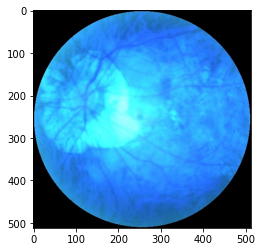

In [15]:
img = df_myo_filenames[34]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

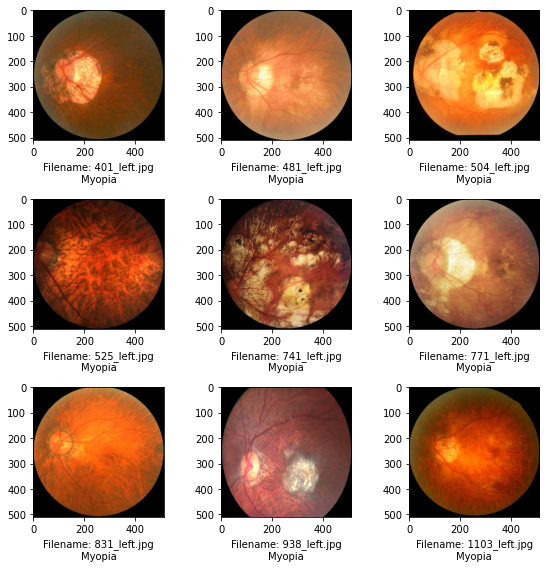

In [16]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_myo_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Myopia'.format(df_myo_filenames[i+9]))
    
plt.tight_layout()

In [17]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [18]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [19]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [20]:
len(df_nor_filenames)

5501

In [21]:
df_nor_filenames = df_nor_filenames.sample(479)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0     2763_left.jpg
1     3209_left.jpg
2     3324_left.jpg
3    3984_right.jpg
4     2403_left.jpg
dtype: object

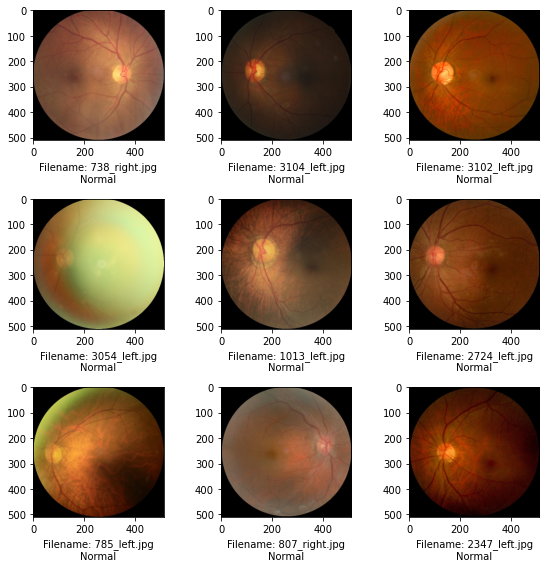

In [22]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [23]:
df_myo_filenames = pd.DataFrame(df_myo_filenames, columns = ["filename"])
df_myo_filenames["label"] = "Myopia"
df_myo_filenames.head()

,filename,label
0,13_left.jpg,Myopia
1,18_left.jpg,Myopia
2,35_left.jpg,Myopia
3,106_left.jpg,Myopia
4,144_left.jpg,Myopia


In [24]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

,filename,label
0,2763_left.jpg,normal
1,3209_left.jpg,normal
2,3324_left.jpg,normal
3,3984_right.jpg,normal
4,2403_left.jpg,normal


In [25]:
df_combined = df_myo_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,13_left.jpg,Myopia
1,18_left.jpg,Myopia
2,35_left.jpg,Myopia
3,106_left.jpg,Myopia
4,144_left.jpg,Myopia
...,...,...
953,2859_right.jpg,normal
954,4167_left.jpg,normal
955,194_left.jpg,normal
956,2371_right.jpg,normal


In [26]:
df_combined = df_combined.sample(958)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,3193_left.jpg,normal
1,4052_right.jpg,normal
2,2621_right.jpg,normal
3,938_left.jpg,Myopia
4,2998_right.jpg,normal
...,...,...
953,1225_left.jpg,Myopia
954,2474_right.jpg,normal
955,1527_right.jpg,Myopia
956,1600_right.jpg,Myopia


In [27]:
a  = np.array(df_combined.filename)

In [28]:
a.shape

(958,)

In [116]:
paths = []
type(paths)

list

In [117]:
for i in range(958):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [118]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3193_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\4052_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2621_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\938_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2998_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3324_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3330_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\214_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\145_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1837_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1594_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1612_right.jpg',
 'C:\\Users

In [119]:
len(paths)

958

In [120]:
data = []

In [121]:
# paths[957]

In [122]:
for i in range(958):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,(224,224))
    data.append(image)
    
# def predict_function(var)
#     global_features = []
#     fixed_size = (224,224)
#     image = cv2.imread("app/src/main/python/1.png")
#     image = cv2.resize(image,fixed_size)

In [123]:
len(data)

958

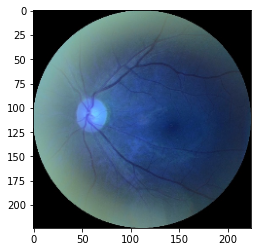

In [64]:
plt.imshow(data[231])

In [128]:
type(data)

list

In [129]:
data = np.array(data)

In [130]:
type(data)

numpy.ndarray

### Scalng the data (0 to 1)

In [131]:
data = data/255

In [133]:
x = data
y = []
for i in df_combined.label:
    if(i=='Myopia'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [134]:
len(x)

958

In [135]:
len(y)

958

## Splitting the Data into the test,train,val

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

766
96
96


### Data Augmentation

In [138]:
from tensorflow.keras import layers

In [139]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [140]:
from tensorflow.keras.models import Sequential

In [141]:
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


24/24 [==============================] - 33s 1s/step - loss: 0.7525 - accuracy: 0.5601
Epoch 2/30
24/24 [==============================] - 31s 1s/step - loss: 0.5619 - accuracy: 0.7050
Epoch 3/30
24/24 [==============================] - 31s 1s/step - loss: 0.5388 - accuracy: 0.7219
Epoch 4/30
24/24 [==============================] - 31s 1s/step - loss: 0.4786 - accuracy: 0.7728
Epoch 5/30
24/24 [==============================] - 31s 1s/step - loss: 0.3787 - accuracy: 0.8420
Epoch 6/30
24/24 [==============================] - 31s 1s/step - loss: 0.3709 - accuracy: 0.8512
Epoch 7/30
24/24 [==============================] - 31s 1s/step - loss: 0.3418 - accuracy: 0.8564
Epoch 8/30
24/24 [==============================] - 31s 1s/step - loss: 0.3797 - accuracy: 0.8381
Epoch 9/30
24/24 [==============================] - 31s 1s/step - loss: 0.3622 - accuracy: 0.8460
Epoch 10/30
24/24 [==============================] - 31s 1s/step - loss: 0.3128 - accuracy: 0.8773
Epoch 11/30
24/24 [===========

In [142]:
model.evaluate(x_val,y_val)

3/3 [==============================] - 1s 332ms/step - loss: 0.2219 - accuracy: 0.9271


[0.22185952961444855, 0.9270833134651184]

In [143]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:9]

[0, 0, 1, 1, 0, 0, 0, 1, 0]

In [145]:
y_pred[10:19]

[1, 0, 0, 1, 0, 1, 0, 1, 1]

In [146]:
y[10:19]

array([1, 1, 0, 0, 1, 0, 0, 1, 0])

In [147]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 1s 345ms/step - loss: 0.2440 - accuracy: 0.9062


[0.24404795467853546, 0.90625]

In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50        43
           1       0.57      0.51      0.54        53

    accuracy                           0.52        96
   macro avg       0.52      0.52      0.52        96
weighted avg       0.53      0.52      0.52        96



# Transfer learning

### MobileNet V2 Model

In [151]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [152]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [153]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [154]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
24/24 [==============================] - 30s 981ms/step - loss: 0.4925 - accuracy: 0.7585
Epoch 2/5
24/24 [==============================] - 24s 983ms/step - loss: 0.1781 - accuracy: 0.9491
Epoch 3/5
24/24 [==============================] - 23s 980ms/step - loss: 0.1244 - accuracy: 0.9661
Epoch 4/5
24/24 [==============================] - 23s 959ms/step - loss: 0.1050 - accuracy: 0.9700
Epoch 5/5
24/24 [==============================] - 24s 983ms/step - loss: 0.0897 - accuracy: 0.9765


In [155]:
model.evaluate(x_val,y_val)

3/3 [==============================] - 4s 994ms/step - loss: 0.1374 - accuracy: 0.9271


[0.13740430772304535, 0.9270833134651184]

In [156]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 3s 990ms/step - loss: 0.0730 - accuracy: 0.9792


[0.0729956179857254, 0.9791666865348816]

In [159]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0]

In [160]:
y_test[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        46

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96

